Import the modules that will be used.

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

In [2]:
#1. Multiplications : n, additions: n-1 --> complexity: O(n)
#2. (complexity of dot product between two vectors) * n = n^2 --> complexity: O(n^2)
#3. (complexity of dot product between two vectors) * n^2 = n^3 --> complexity: O(n^3)

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [10]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

/tmp/ipykernel_643/1108553842.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return factorial(n - 1)*n


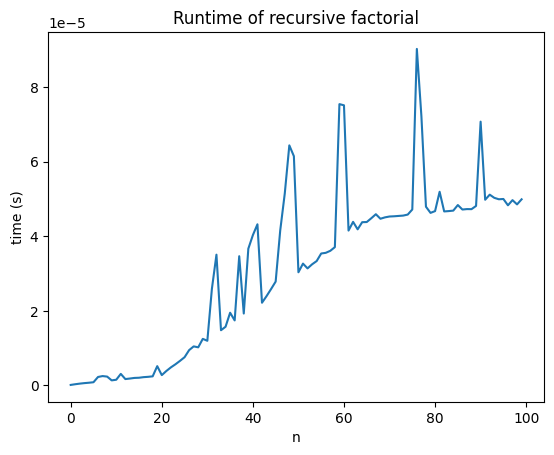

In [11]:
import time
import matplotlib.pyplot as plt

ns = np.arange(100)  
times = []

for n in ns:
    t = %timeit -q -n5 -r2 -o factorial(n)
    times.append(t.best)

# plot results
plt.plot(ns, times)
plt.xlabel("n")
plt.ylabel("time (s)")
plt.title("Runtime of recursive factorial")
plt.show()


## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [12]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [13]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [14]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12)

times = []

for n in N:
    A = np.random.rand(n, n)
    # Time the determinant computation
    t = %timeit -q -n1 -r1 -o np.linalg.slogdet(A)
    times.append(t.best)


Plot result:

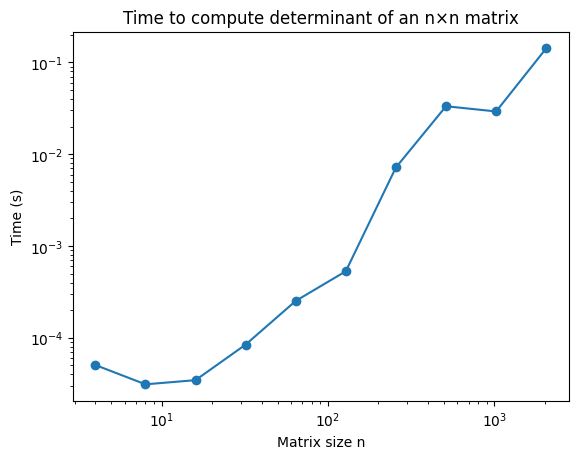

In [15]:
plt.loglog(N, times, marker='o')
plt.xlabel("Matrix size n")
plt.ylabel("Time (s)")
plt.title("Time to compute determinant of an n×n matrix")
plt.show()
